**I. PREPARING ESSENTIAL LIBRARIES**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from analysis_functions.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis
from analysis_functions.multivariate_analysis import SimpleMultivariateAnalysis
from processing_functions.outlier_detection import OutlierDetector, IQROutlierDetection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**II. PROCESSING DATA**

In [2]:
df = pd.read_csv("movies_dataset.csv")
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MovieID               999999 non-null  int64  
 1   Title                 999999 non-null  object 
 2   Genre                 999999 non-null  object 
 3   ReleaseYear           999999 non-null  int64  
 4   ReleaseDate           999999 non-null  object 
 5   Country               999999 non-null  object 
 6   BudgetUSD             999999 non-null  float64
 7   US_BoxOfficeUSD       999999 non-null  float64
 8   Global_BoxOfficeUSD   999999 non-null  float64
 9   Opening_Day_SalesUSD  999999 non-null  float64
 10  One_Week_SalesUSD     999999 non-null  float64
 11  IMDbRating            999999 non-null  float64
 12  RottenTomatoesScore   999999 non-null  int64  
 13  NumVotesIMDb          999999 non-null  int64  
 14  NumVotesRT            999999 non-null  int64  
 15  

,MovieID,Title,Genre,ReleaseYear,ReleaseDate,Country,BudgetUSD,US_BoxOfficeUSD,Global_BoxOfficeUSD,Opening_Day_SalesUSD,One_Week_SalesUSD,IMDbRating,RottenTomatoesScore,NumVotesIMDb,NumVotesRT,Director,LeadActor
count,999999.000000,999999,999999,999999.000000,999999,999999,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,9.999990e+05,999999.000000,999999.000000,999999.000000,999999.000000,999999,999999
unique,NaN,9665,8,NaN,27757,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,299
top,NaN,With,Drama,NaN,24-04-2025,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tara Underwood,Jeffrey Smith
freq,NaN,506,250018,NaN,93,714581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6898,6688
mean,500000.000000,NaN,NaN,1998.001220,NaN,NaN,9.802824e+06,1.496163e+07,2.720625e+07,2.992745e+06,7.483442e+06,6.494788,64.776426,9137.184011,2031.880340,NaN,NaN
std,288674.990255,NaN,NaN,19.260863,NaN,NaN,2.249421e+07,3.879403e+07,6.954294e+07,8.132438e+06,1.955337e+07,1.485606,17.592474,24922.362780,8433.380602,NaN,NaN
min,1.000000,NaN,NaN,1950.000000,NaN,NaN,1.000000e+05,4.002547e+04,1.000000e+05,4.050470e+03,1.650742e+04,1.000000,0.000000,100.000000,50.000000,NaN,NaN
25%,250000.500000,NaN,NaN,1984.000000,NaN,NaN,1.190511e+06,1.489805e+06,2.762370e+06,2.790262e+05,7.383145e+05,5.500000,53.000000,1083.000000,119.000000,NaN,NaN
50%,500000.000000,NaN,NaN,2001.000000,NaN,NaN,3.265790e+06,4.388876e+06,8.090223e+06,8.387221e+05,2.179436e+06,6.500000,65.000000,2983.000000,405.000000,NaN,NaN
75%,749999.500000,NaN,NaN,2014.000000,NaN,NaN,9.002791e+06,1.287606e+07,2.355245e+07,2.510360e+06,6.415143e+06,7.500000,77.000000,8192.000000,1360.000000,NaN,NaN


In [3]:
df['ReleaseYear'] = df['ReleaseYear'].astype('object')
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')
df['Profit'] = df['Global_BoxOfficeUSD'] - df['BudgetUSD']
df['AverageVote'] = round(((df['NumVotesIMDb'] + df['NumVotesRT'])/ 2),2)
df.to_csv("movies_dataset.csv")

C:\Users\levuo\AppData\Local\Temp\ipykernel_19772\1558604179.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'], errors='coerce')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   MovieID               999999 non-null  int64         
 1   Title                 999999 non-null  object        
 2   Genre                 999999 non-null  object        
 3   ReleaseYear           999999 non-null  object        
 4   ReleaseDate           999999 non-null  datetime64[ns]
 5   Country               999999 non-null  object        
 6   BudgetUSD             999999 non-null  float64       
 7   US_BoxOfficeUSD       999999 non-null  float64       
 8   Global_BoxOfficeUSD   999999 non-null  float64       
 9   Opening_Day_SalesUSD  999999 non-null  float64       
 10  One_Week_SalesUSD     999999 non-null  float64       
 11  IMDbRating            999999 non-null  float64       
 12  RottenTomatoesScore   999999 non-null  int64         
 13 

**III. EXPLORATORY DATA ANALYSIS (EDA)**

**Checking the quantity of different values ​​of important qualitative features**

In [5]:
print('Số lượng các bộ phim khác nhau là: ', df['Title'].nunique())

Số lượng các bộ phim khác nhau là:  9665


In [6]:
print('Số lượng các thể loại phim là: ', df['Genre'].nunique())

Số lượng các thể loại phim là:  8


In [7]:
print('Số lượng các quốc gia đã đóng góp phim là: ', df['Country'].nunique())

Số lượng các quốc gia đã đóng góp phim là:  10


In [8]:
print('Số lượng các năm khác nhau đã đóng góp phim qua thời gian là: ', df['ReleaseYear'].nunique())

Số lượng các năm khác nhau đã đóng góp phim qua thời gian là:  76


In [9]:
print('Số lượng các đạo diễn đã đóng góp phim là: ', df['Director'].nunique())

Số lượng các đạo diễn đã đóng góp phim là:  150


In [10]:
print('Số lượng các diễn viên chính đã tham gia đóng phim là: ', df['LeadActor'].nunique())

Số lượng các diễn viên chính đã tham gia đóng phim là:  299


**Detecting outliers for the most important feature 'Global_BoxOfficeUSD'**

2025-10-24 04:32:21,096 - INFO - Executing outlier detection strategy.
2025-10-24 04:32:21,098 - INFO - Detecting outliers using the IQR method.
2025-10-24 04:32:21,149 - INFO - Outliers detected using the IQR method.
2025-10-24 04:32:21,152 - INFO - Visualizing outliers for features: ['Global_BoxOfficeUSD']


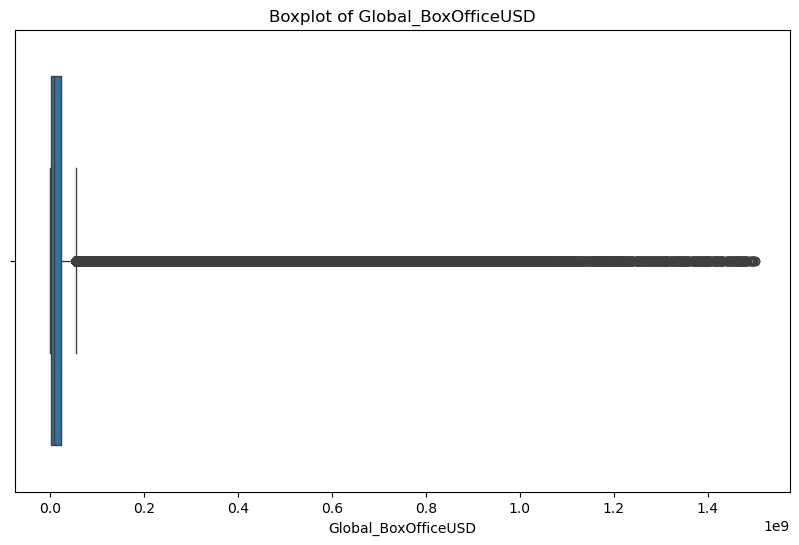

2025-10-24 04:32:23,991 - INFO - Outlier visualization completed.


In [11]:
outlier_detector = OutlierDetector(IQROutlierDetection())


outliers = outlier_detector.detect_outliers(df, "Global_BoxOfficeUSD")
outlier_detector.visualize_outliers(df, features=["Global_BoxOfficeUSD"])

2025-10-24 04:32:24,009 - INFO - Executing outlier detection strategy.
2025-10-24 04:32:24,010 - INFO - Detecting outliers using the IQR method.
2025-10-24 04:32:24,064 - INFO - Outliers detected using the IQR method.
2025-10-24 04:32:24,066 - INFO - Removing outliers from the dataset.
2025-10-24 04:32:24,218 - INFO - Outlier handling completed.
2025-10-24 04:32:24,275 - INFO - Visualizing outliers for features: ['Global_BoxOfficeUSD']


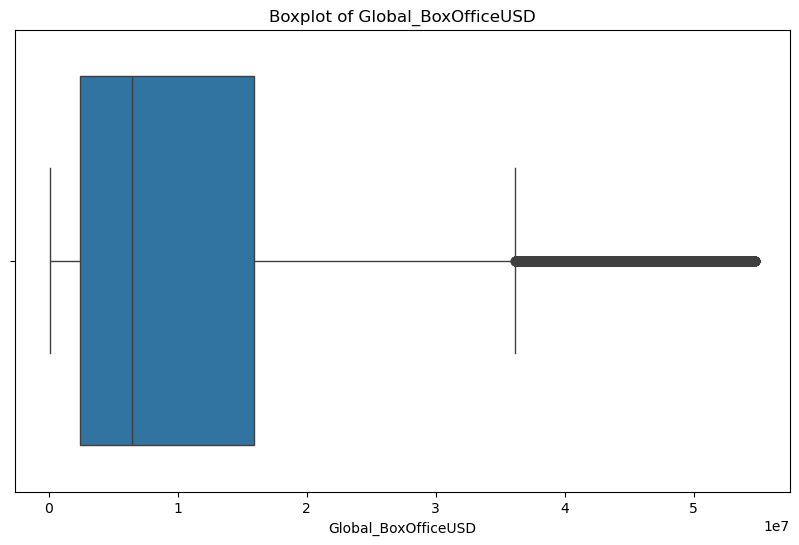

2025-10-24 04:32:26,473 - INFO - Outlier visualization completed.


In [12]:
df = outlier_detector.handle_outliers(df, column_name= "Global_BoxOfficeUSD", method="remove")
outlier_detector.visualize_outliers(df, features=["Global_BoxOfficeUSD"])

**Checking the relationship between quantitative variables**

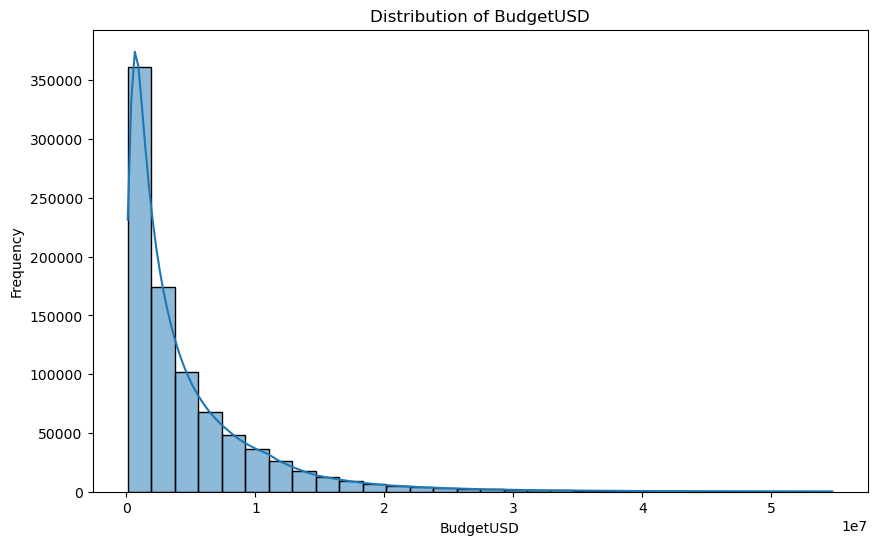

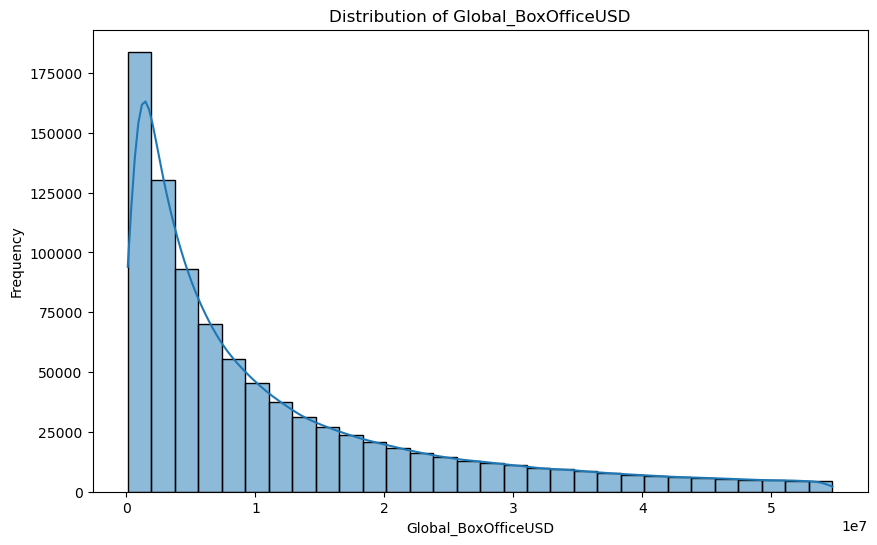

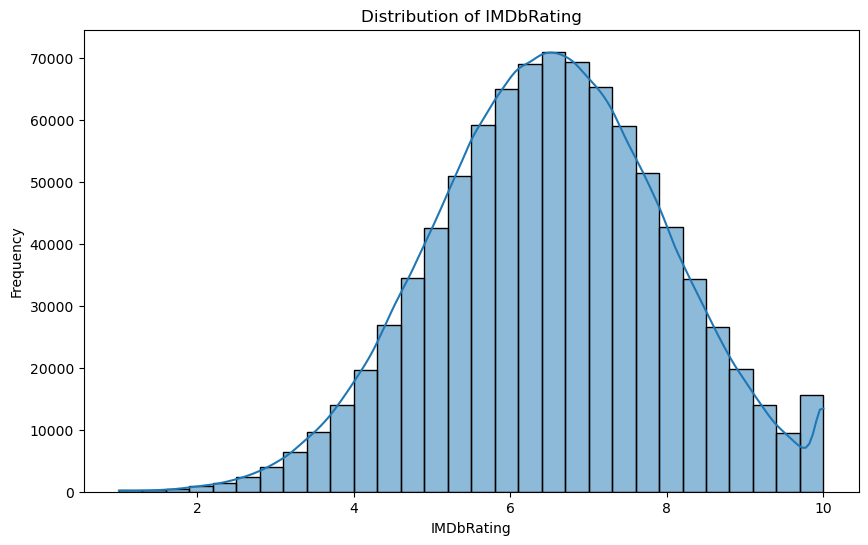

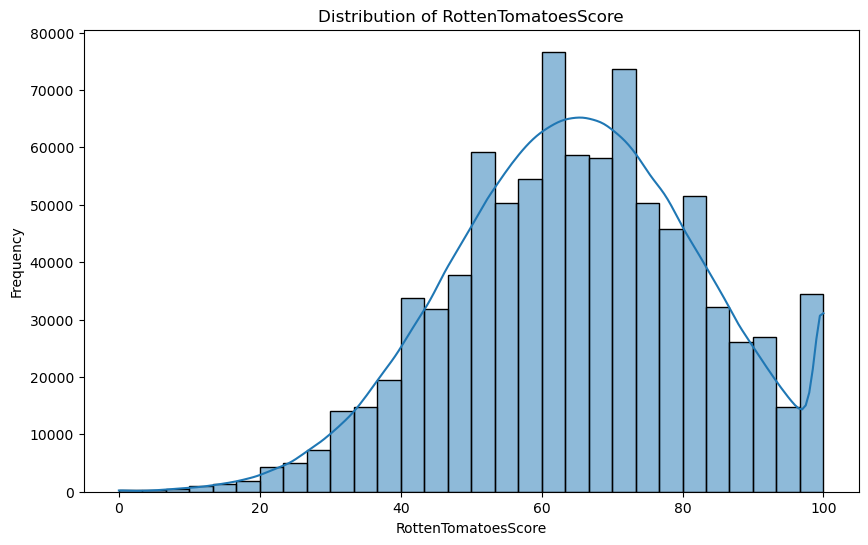

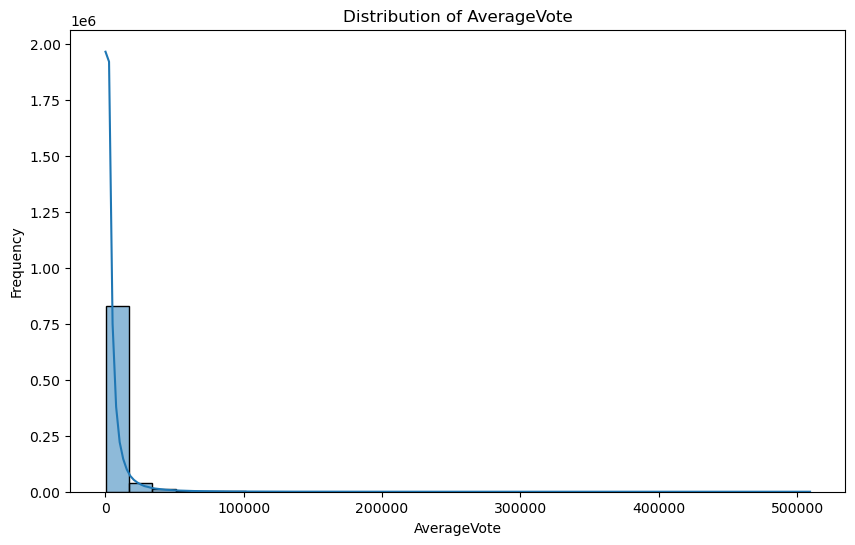

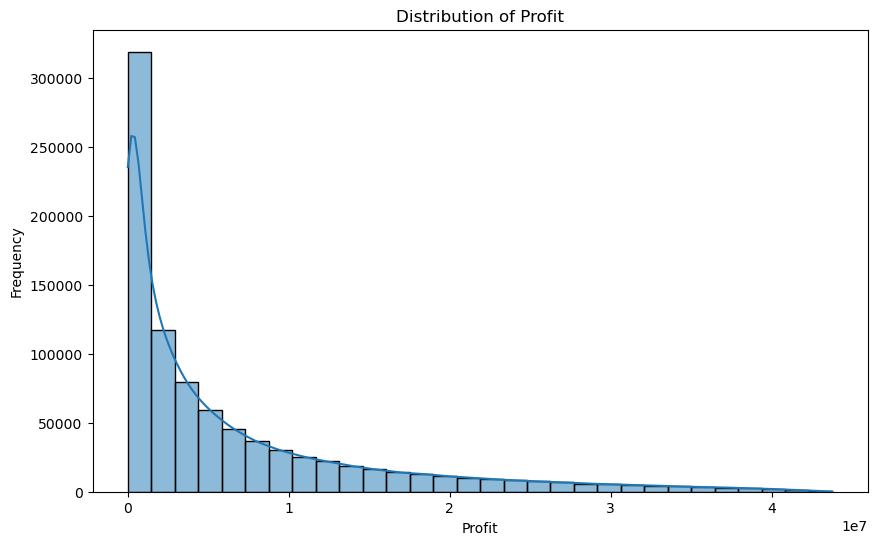

In [13]:
numeric_columns = ["BudgetUSD", "Global_BoxOfficeUSD", "IMDbRating", "RottenTomatoesScore", "AverageVote", "Profit"]

univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())

for column_name in numeric_columns:
    univariate_analyzer. execute_analysis(df, column_name)

**Analyzing the correlation (relationship) between quantitative variables in the dataset**

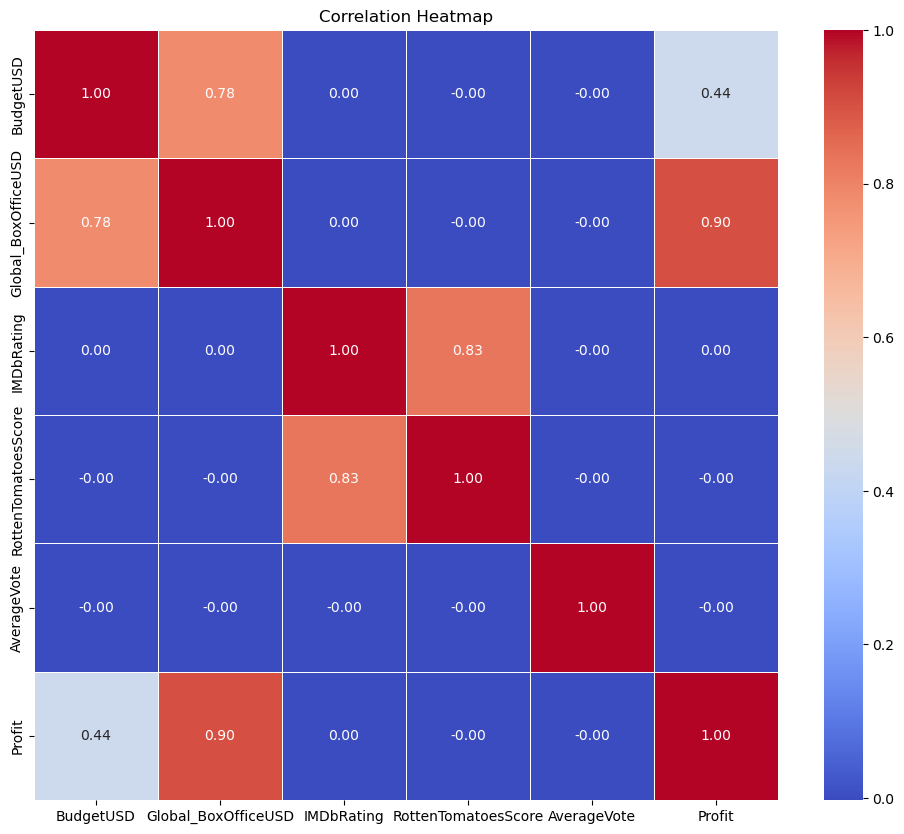

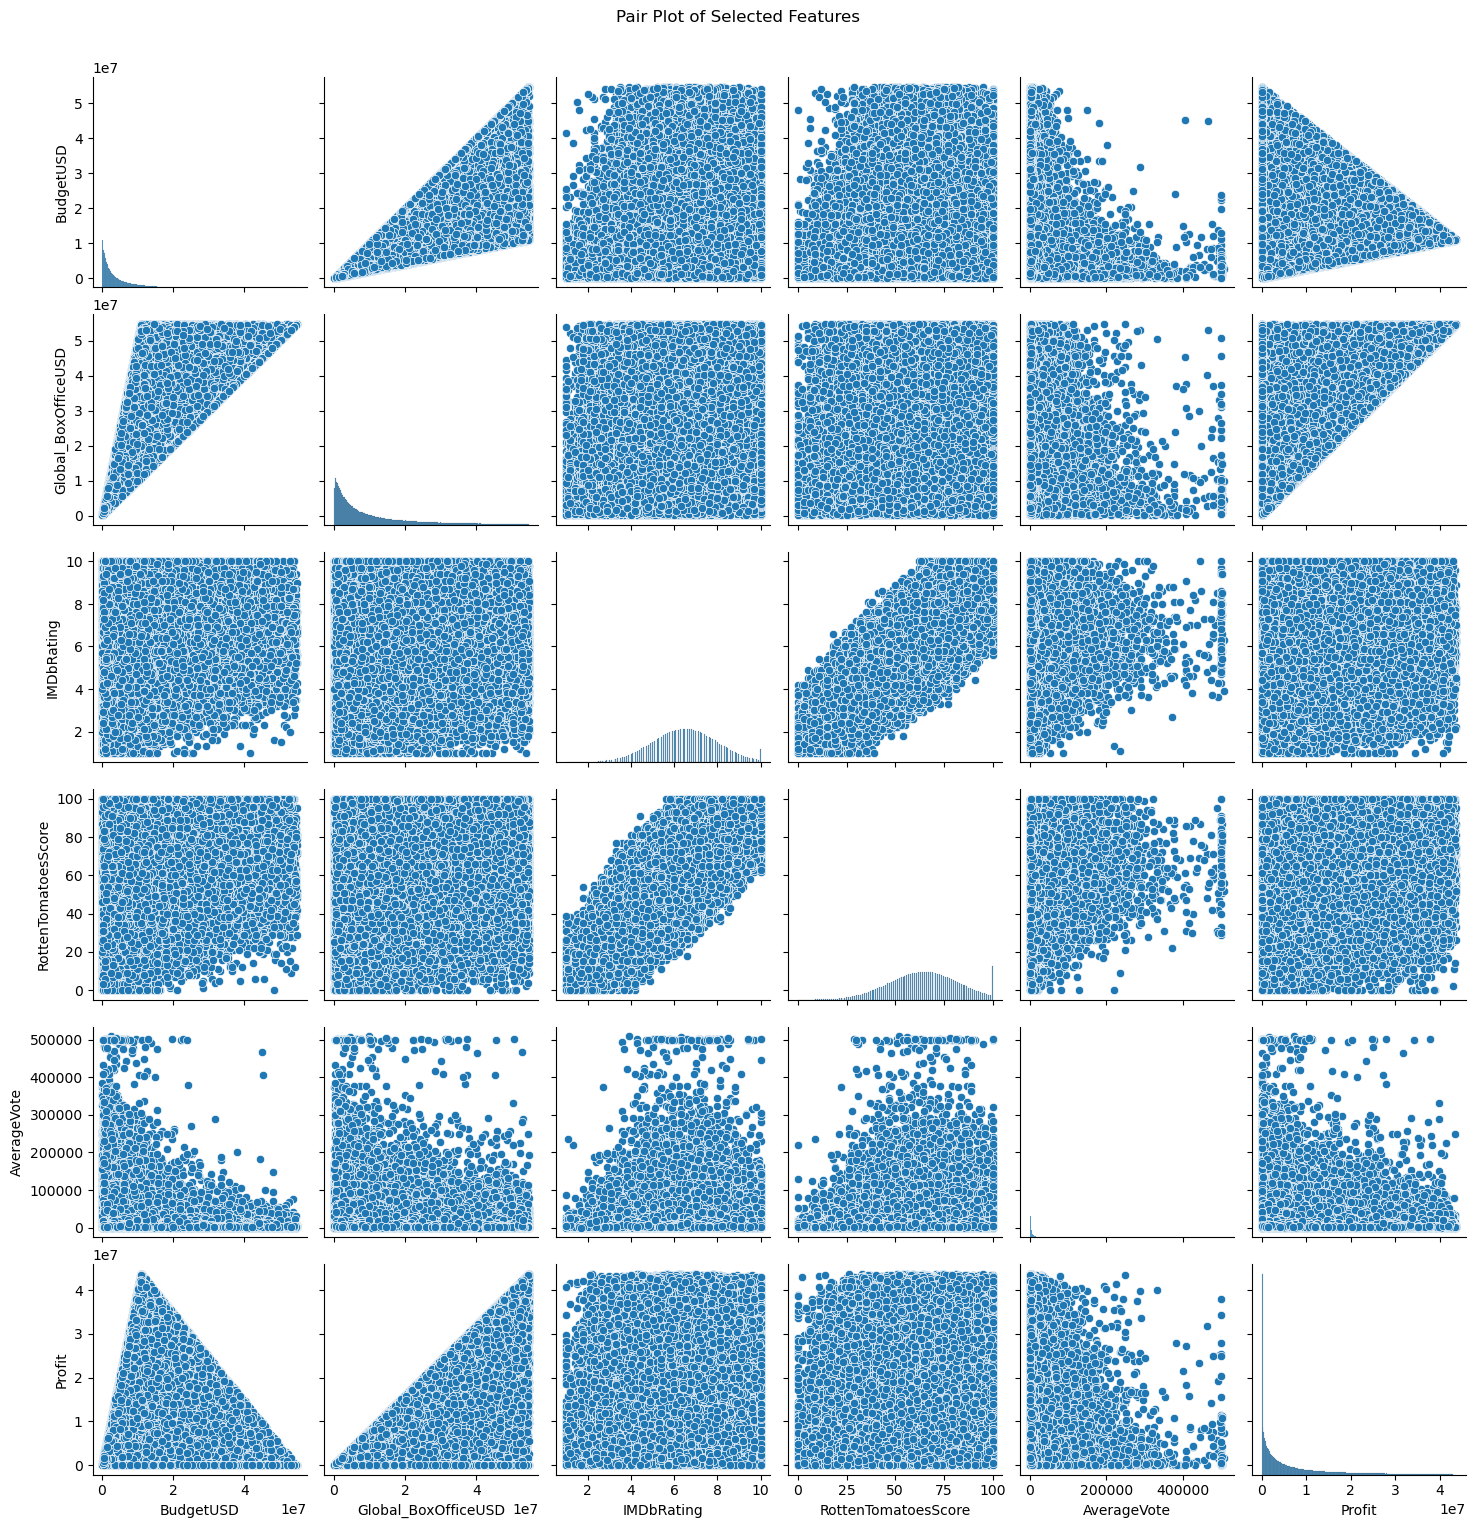

In [14]:
multivariate_analyzer = SimpleMultivariateAnalysis()

selected_features = df[["BudgetUSD", "Global_BoxOfficeUSD", "IMDbRating", "RottenTomatoesScore", "AverageVote", "Profit"]]

multivariate_analyzer.analyze(selected_features)

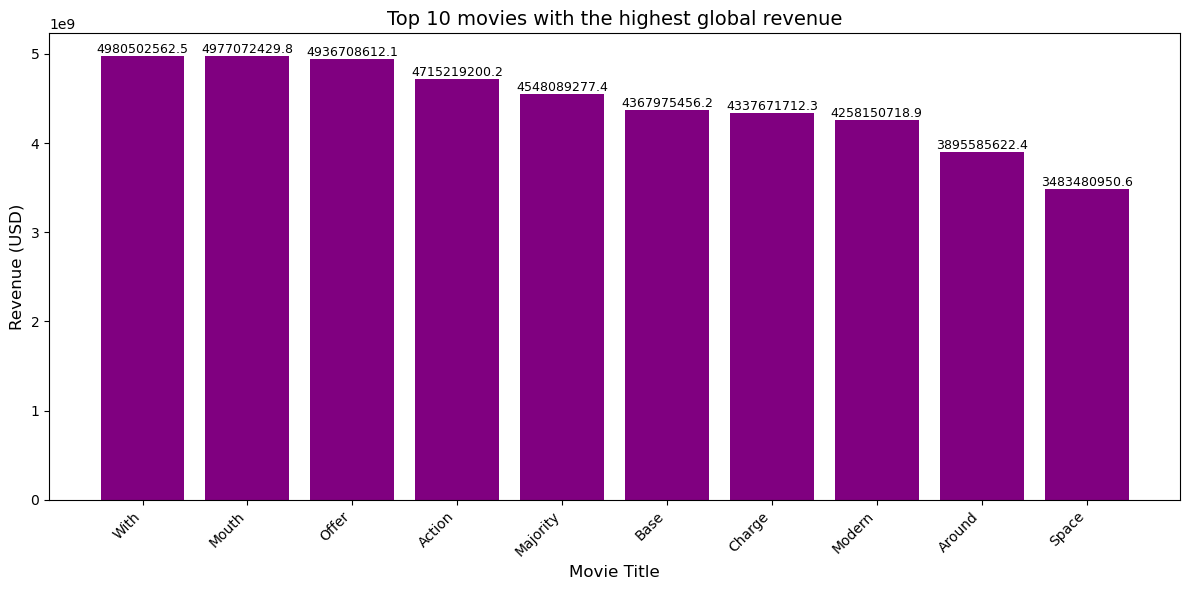

In [15]:
# Calculating the total box office revenue for each movie
avg_scores = df.groupby('Title')['Global_BoxOfficeUSD'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_scores.index, avg_scores.values, color='purple')

# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

# Customizing labels and title
plt.title('Top 10 movies with the highest global revenue', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


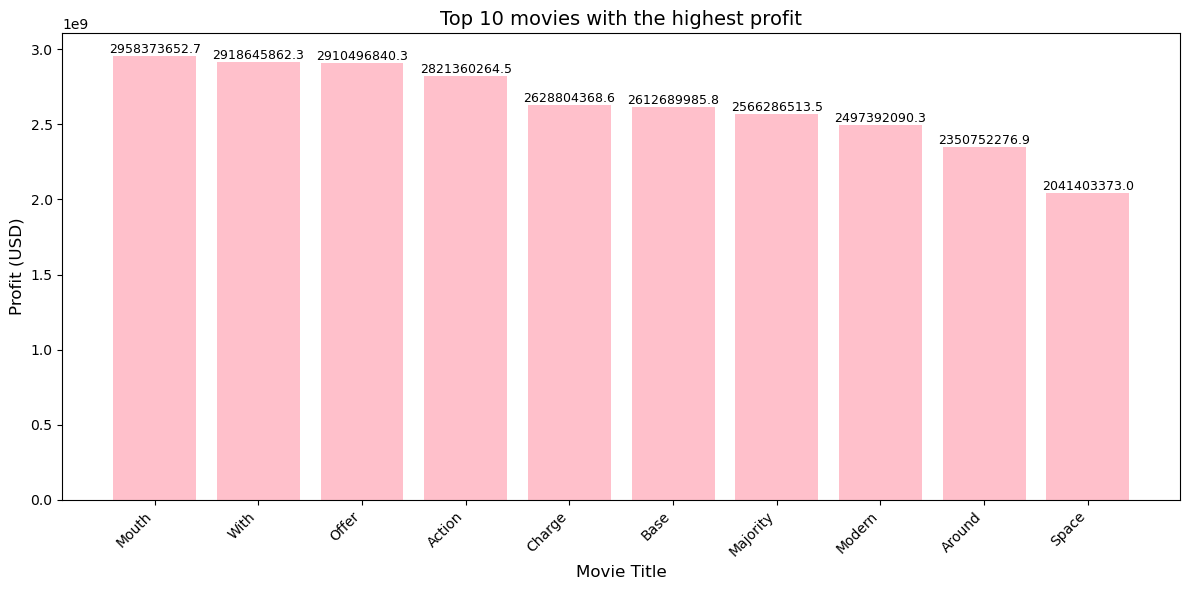

In [16]:
# Calculating the total profit for each movie and get the top 10
avg_scores = df.groupby('Title')['Profit'].sum().sort_values(ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_scores.index, avg_scores.values, color='pink')

# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

# Customizing labels and title
plt.title('Top 10 movies with the highest profit', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


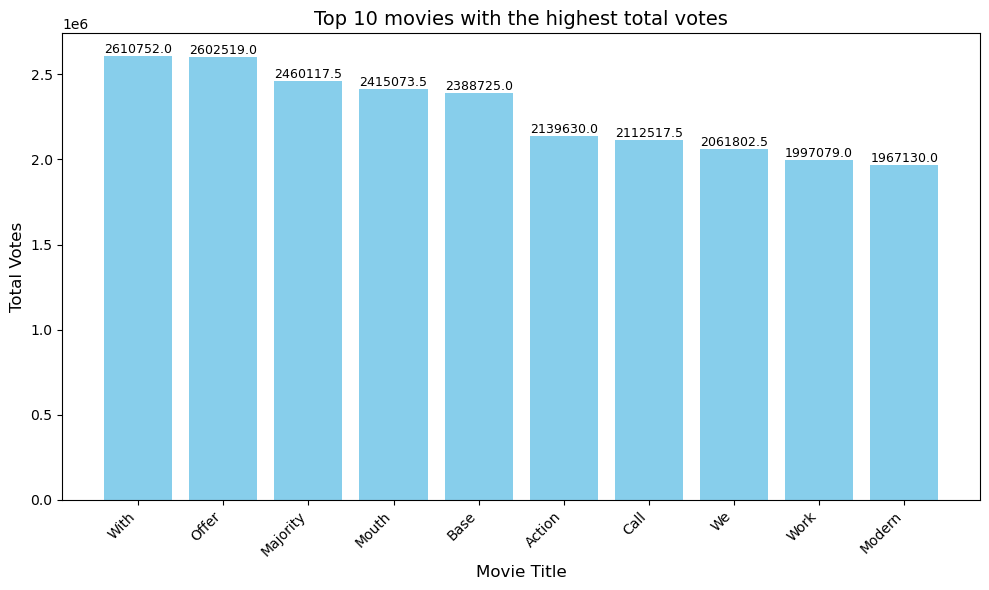

In [17]:
# Calculating the total votes for each movie
avg_scores = df.groupby('Title')['AverageVote'].sum().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_scores.index, avg_scores.values, color='skyblue')

# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

# Customizing labels and title
plt.title('Top 10 movies with the highest total votes', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

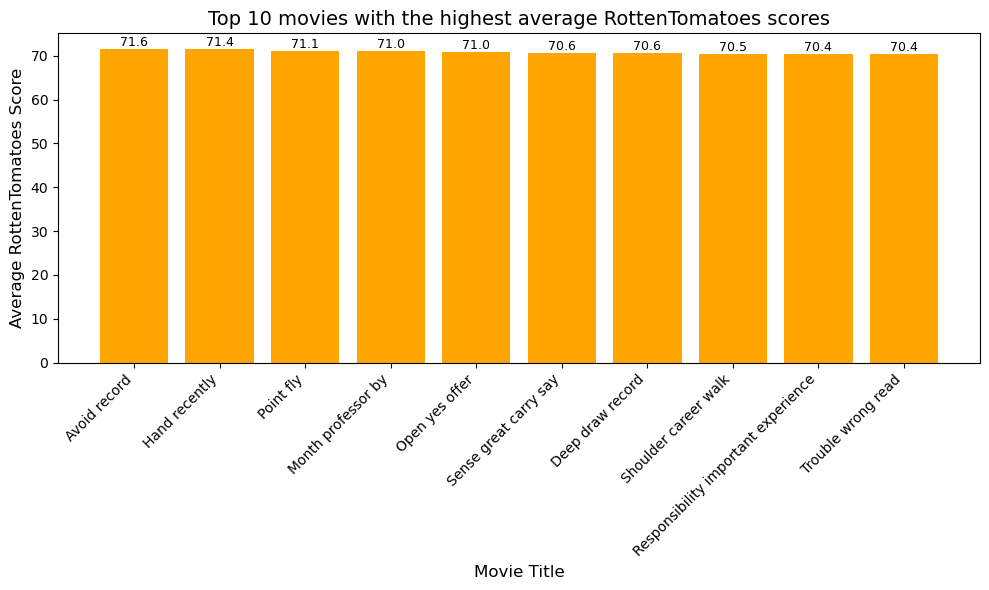

In [18]:
# Calculating the average RottenTomatoes score for each movie
avg_scores = df.groupby('Title')['RottenTomatoesScore'].mean().sort_values(ascending=False).head(10)

# Creating a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_scores.index, avg_scores.values, color='orange')

# Adding score labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

# Customizing labels and title
plt.title('Top 10 movies with the highest average RottenTomatoes scores', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Average RottenTomatoes Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


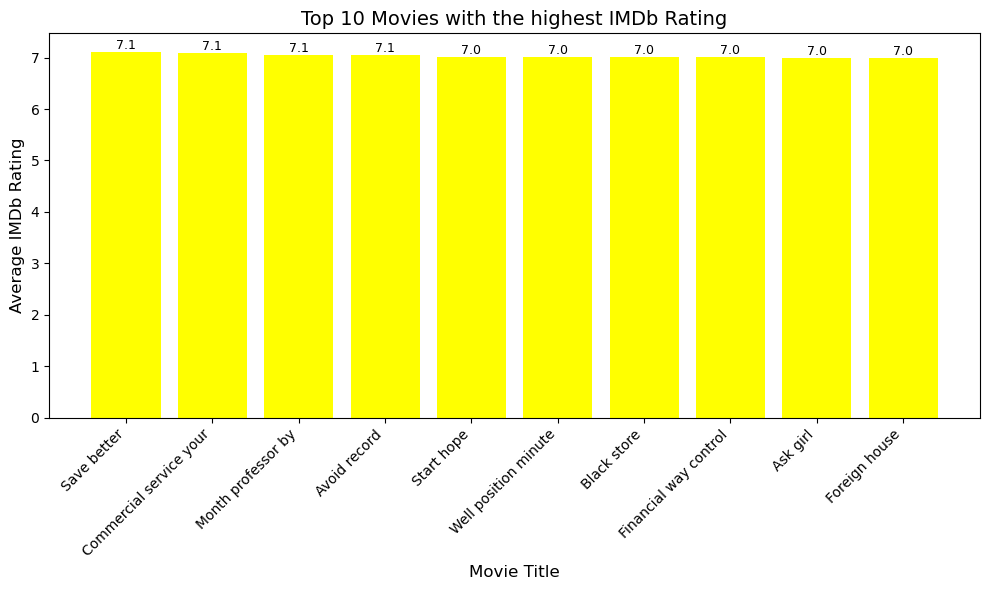

In [19]:
# Calculating the average IMDb rating for each movie
avg_scores = df.groupby('Title')['IMDbRating'].mean().sort_values(ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_scores.index, avg_scores.values, color='yellow')

# Adding the rating value on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=9)

# Customizing labels and title
plt.title('Top 10 Movies with the highest IMDb Rating', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Average IMDb Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**IV. WHAT IF ANALYSIS**

=== Model 1: Budget → Revenue ===
MAE: 5,185,446.28
RMSE: 7,498,649.16
R²: 0.6216
----------------------------------------
=== Model 2: AverageVote → Profit ===
MAE: 6,325,661.01
RMSE: 8,445,265.13
R²: 0.0001
----------------------------------------


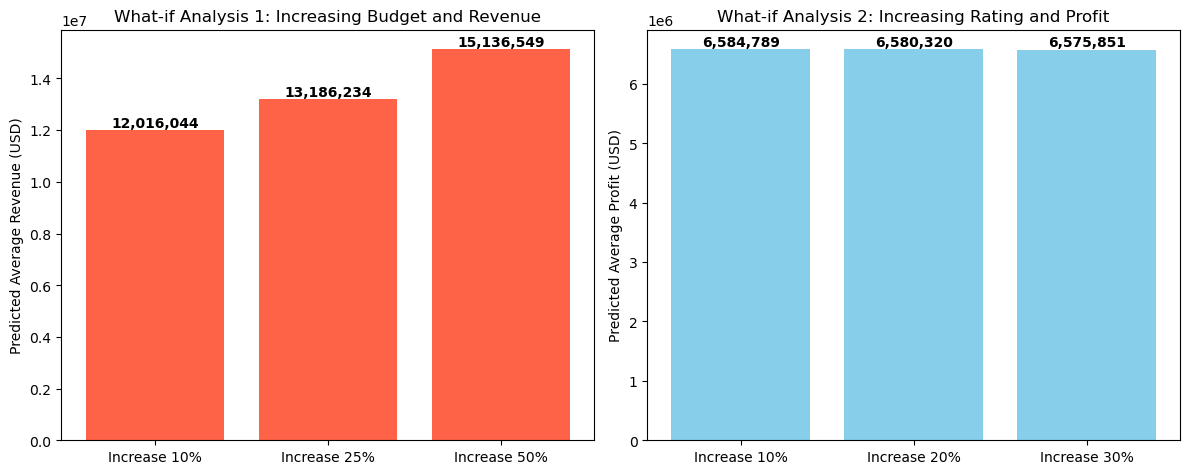

In [20]:
# Taking a smaller sample to speed up computation
sample_df = df.sample(5000, random_state=42)

# ===== SCENARIO 1: Budget ↑ → Revenue change =====
X1 = sample_df[['BudgetUSD']]
y1 = sample_df['Global_BoxOfficeUSD']

model1 = LinearRegression()
model1.fit(X1, y1)

# ---- Evaluate model 1 ----
y1_pred = model1.predict(X1)
mae1 = mean_absolute_error(y1, y1_pred)
mse1 = mean_squared_error(y1, y1_pred)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y1, y1_pred)

print("=== Model 1: Budget → Revenue ===")
print(f"MAE: {mae1:,.2f}")
print(f"RMSE: {rmse1:,.2f}")
print(f"R²: {r2_1:.4f}")
print("-" * 40)

increase_rates = [0.1, 0.25, 0.5]  # 10%, 25%, 50%
scenarios_1 = {}

for r in increase_rates:
    new_budget = X1 * (1 + r)
    predicted_revenue = model1.predict(new_budget)
    scenarios_1[f"Increase {int(r*100)}%"] = predicted_revenue.mean()

# ===== SCENARIO 2: AverageVote ↑ → Profit change =====
X2 = sample_df[['AverageVote']]
y2 = sample_df['Profit']

model2 = LinearRegression()
model2.fit(X2, y2)

# ---- Evaluate model 2 ----
y2_pred = model2.predict(X2)
mae2 = mean_absolute_error(y2, y2_pred)
mse2 = mean_squared_error(y2, y2_pred)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y2, y2_pred)

print("=== Model 2: AverageVote → Profit ===")
print(f"MAE: {mae2:,.2f}")
print(f"RMSE: {rmse2:,.2f}")
print(f"R²: {r2_2:.4f}")
print("-" * 40)

increase_rates_vote = [0.1, 0.2, 0.3]  # 10%, 20%, 30%
scenarios_2 = {}

for r in increase_rates_vote:
    new_vote = X2 * (1 + r)
    predicted_profit = model2.predict(new_vote)
    scenarios_2[f"Increase {int(r*100)}%"] = predicted_profit.mean()

# ===== PLOTTING THE CHARTS =====
plt.figure(figsize=(12, 5))

# --- Chart 1: Budget vs Revenue ---
plt.subplot(1, 2, 1)
bars1 = plt.bar(scenarios_1.keys(), scenarios_1.values(), color='tomato')
plt.title('What-if Analysis 1: Increasing Budget and Revenue')
plt.ylabel('Predicted Average Revenue (USD)')
plt.grid(False)

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# --- Chart 2: AverageVote vs Profit ---
plt.subplot(1, 2, 2)
bars2 = plt.bar(scenarios_2.keys(), scenarios_2.values(), color='skyblue')
plt.title('What-if Analysis 2: Increasing Rating and Profit')
plt.ylabel('Predicted Average Profit (USD)')
plt.grid(False)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
